## About dataset:

This dataset is taken from Kaggle. It contains details of customers in a mall. The aim of this project is to cluster the customers based on given features.

These features are:
* Gender (Male or Female)
* Age
* Annual Income in k$
* Spending Score (in range of 1 to 100)

Data set: https://www.kaggle.com/datasets/shwetabh123/mall-customers

## Problem Statement:
Use clustering techniques for customer dataset 

## Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploring data

In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Observation:
* There are 5 columns and 200 rows in given dataset.
* All the columns are numerical except 'Gender' which is categorical in nature.
* There are neither any missing values nor any duplicate values in the dataset. 

## Data preprocessing

* ### Remove unnecessary columns
As 'CustomerID' is not statistically important, drop this column. 

In [8]:
del df['CustomerID']

* ### Renaming columns

In [9]:
df.columns = ['Gender', 'Age', 'Annual_income', 'Spending_score']
df.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


* ### Converting categorical column into numerical data type 

In [10]:
df['Gender'].replace({"Male":1,"Female":2}, inplace = True)
df.head()

,Gender,Age,Annual_income,Spending_score
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


We have done data preprocessing successfully. Now, let's explore it more through data visualization.

## Data Vizualization

<AxesSubplot:>

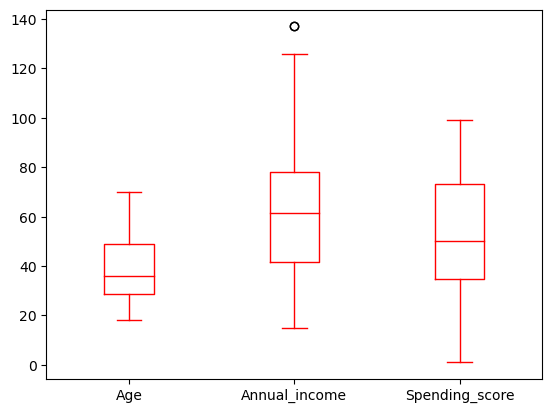

In [11]:
df[['Age', 'Annual_income','Spending_score']].plot(kind='box', color='red')

* These boxplots give data distibution of three columns, namely, 'Age', 'Annual_income', 'Spending_score'. 
* Age column has values ranging from 20 to around 75. Median value is around 38.
* Annual income values range from 15 to 135. There is an outlier in this column. Median value is around 60. 
* Spending score range from 0 to 100 with median value at 50.

<AxesSubplot:>

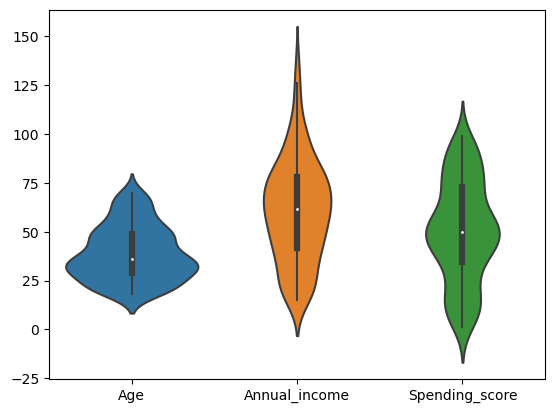

In [12]:
sns.violinplot(data=df[['Age', 'Annual_income','Spending_score']])

* These violin plots give data distribution of columns 'Age', 'Annual_income' and 'Spending_score'. 
* Most of the customers are in the age group of 20 to 40 years.
* The number of customers decrease as the annual income increases. 
* Most customers have spending score around 50.

<function matplotlib.pyplot.show(close=None, block=None)>

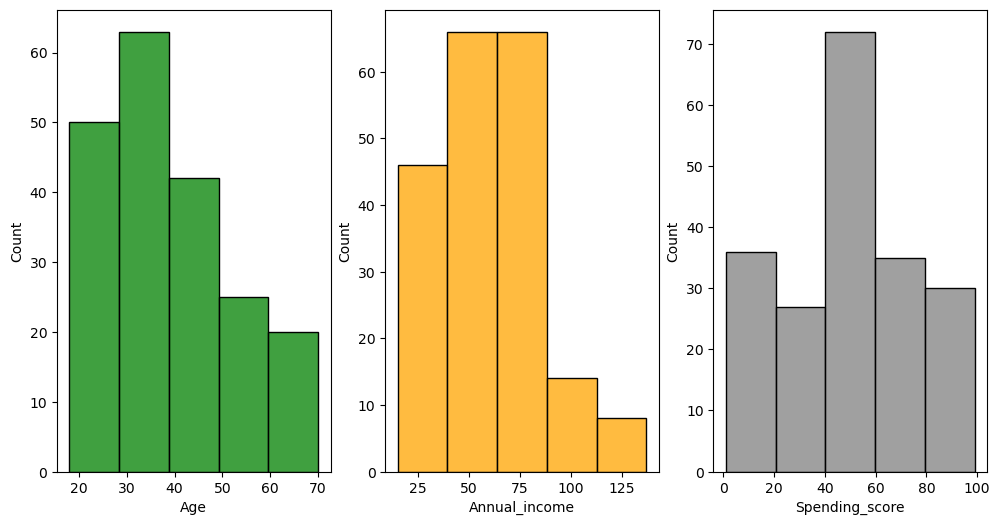

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(df['Age'], bins = 5, color='green')
plt.subplot(1,3,2)
sns.histplot(df['Annual_income'], bins = 5, color='orange')
plt.subplot(1,3,3)
sns.histplot(df['Spending_score'], bins = 5, color='gray')
plt.show

* Most of the customers are in the age group of 30 to 40 years.
* Many customers are in the income group of 30 to 90 thousand dollars.
* Most of the customers have spending score around 50.

<AxesSubplot:ylabel='Gender'>

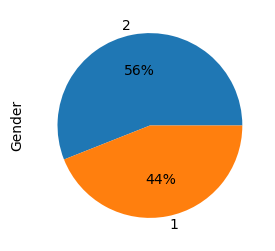

In [14]:
plt.figure(figsize=(3,3))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.0f%%')

Nearly 56% are females and 44% are males in given customer dataset.

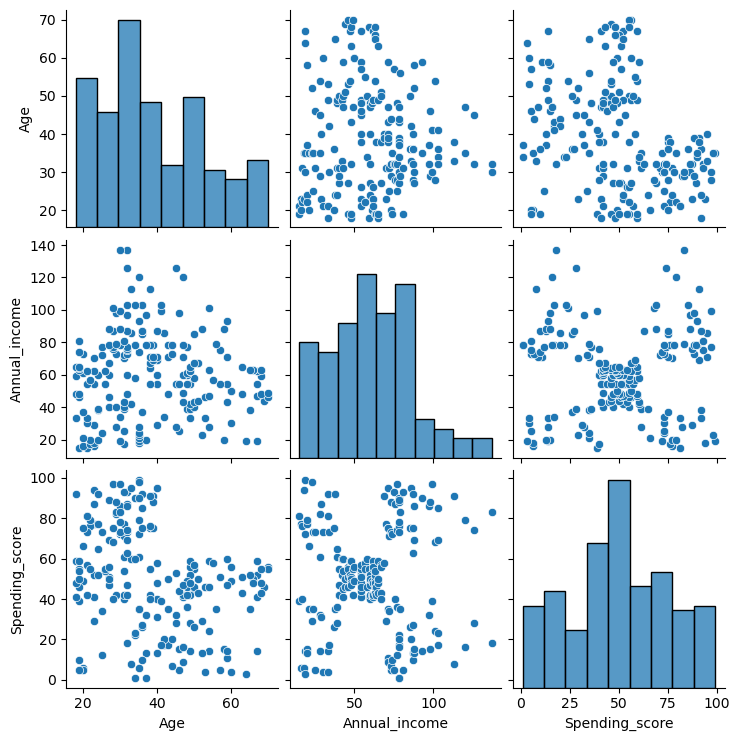

In [15]:
sns.pairplot(df[['Age','Annual_income','Spending_score']])

This pairplot gives bivariate analysis of given data. Graphs along diagonal are histograms while all other graphs are scatterplots.  

<AxesSubplot:>

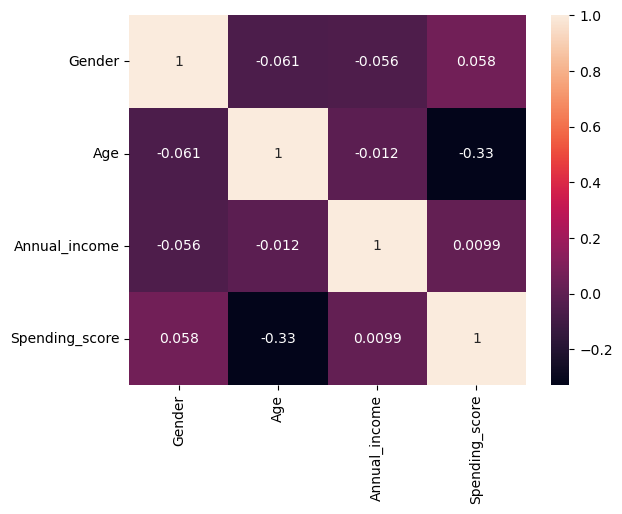

In [16]:
sns.heatmap(df.corr(), annot = True)

Above heatmap shows that there is negative correlation between age and spending score. 

## Building a model: K Means Clustering

In [17]:
from sklearn.cluster import KMeans
wcss = []
n_clusters = range(2,10)
for k in n_clusters:
    cluster = KMeans(n_clusters=k)
    cluster.fit_predict(df)
    wcss.append(cluster.inertia_)

In [18]:
wcss

[212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75528.58656469136,
 58348.64136331505,
 51573.264799764795,
 44355.31351771352,
 40898.64483084483]

Notice how the wcss is decreasing when number of clusters increase from 2 to 10. Let's visualize it to find the elbow point, which will give us the number of clusters to be formed.

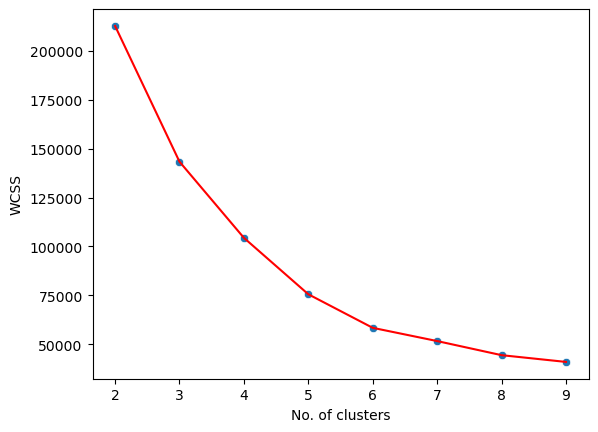

In [19]:
sns.scatterplot(n_clusters,wcss)
sns.lineplot(n_clusters,wcss,color = 'red')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow point seems at No. of clusters = 5. So let's group the given data into 5 clusters using KMeans algorithm. 

In [20]:
cluster = KMeans(n_clusters=5)
y_pred = cluster.fit_predict(df)

In [21]:
y_pred

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

Finally, we have grouped the customers into 5 clusters. Let's vizualize them for better understanding.

## Vizualizating clusters

<AxesSubplot:xlabel='Annual_income', ylabel='Spending_score'>

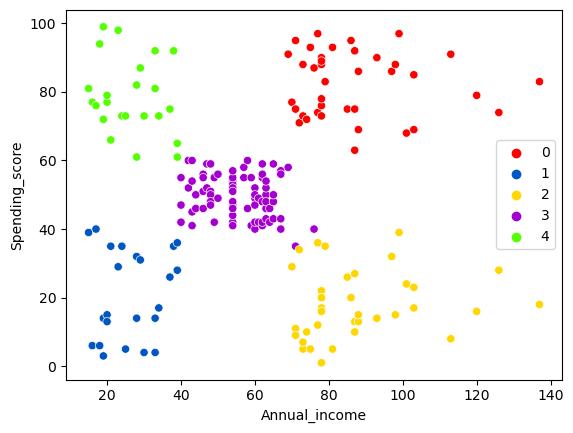

In [22]:
sns.scatterplot(x='Annual_income', y='Spending_score', hue= y_pred, data=df, palette='prism')

## Conclusion:
* We have grouped customers into 5 clusters as can be seen from above scatterplot.
* The customers in green cluster have low income but high spending score. 
* The customers in blue cluster have low income and low spending score. 
* The customers from purple cluster have moderate incomes and have average spending score. 
* The customers in red cluster have high income and high spending score. 
* The customers in yellow cluster have high income but low spending score. 